In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import os

mpl.rcParams['figure.dpi'] = 300

In [2]:
data = os.listdir("/media/urbe/MyADrive1/Antoine/19-11-21_VariantCalling_ARC/coverage")
data = [os.path.join("/media/urbe/MyADrive1/Antoine/19-11-21_VariantCalling_ARC/coverage", f) for f in data if f.endswith(".cov.gz")]

In [3]:
samples = {
    os.path.basename(filepath).split(".")[0]:filepath for filepath in data
}
samples

{'ancestor': '/media/urbe/MyADrive1/Antoine/19-11-21_VariantCalling_ARC/coverage/ancestor.sorted.CALL.bam.cov.gz',
 'P100_C8_E4': '/media/urbe/MyADrive1/Antoine/19-11-21_VariantCalling_ARC/coverage/P100_C8_E4.sorted.CALL.bam.cov.gz',
 '30H_C36_E5': '/media/urbe/MyADrive1/Antoine/19-11-21_VariantCalling_ARC/coverage/30H_C36_E5.sorted.CALL.bam.cov.gz',
 'P250_C8_E3': '/media/urbe/MyADrive1/Antoine/19-11-21_VariantCalling_ARC/coverage/P250_C8_E3.sorted.CALL.bam.cov.gz',
 '30D_C52_E5': '/media/urbe/MyADrive1/Antoine/19-11-21_VariantCalling_ARC/coverage/30D_C52_E5.sorted.CALL.bam.cov.gz',
 '30D_C38_E4': '/media/urbe/MyADrive1/Antoine/19-11-21_VariantCalling_ARC/coverage/30D_C38_E4.sorted.CALL.bam.cov.gz',
 'P500_C16_E5': '/media/urbe/MyADrive1/Antoine/19-11-21_VariantCalling_ARC/coverage/P500_C16_E5.sorted.CALL.bam.cov.gz',
 'P100_C30_E4': '/media/urbe/MyADrive1/Antoine/19-11-21_VariantCalling_ARC/coverage/P100_C30_E4.sorted.CALL.bam.cov.gz',
 '30H_C3_E5': '/media/urbe/MyADrive1/Antoine/19-

In [4]:
histograms = {}

covdata = {
    "sample":[],
    "mean":[],
    "median":[],
    "std":[],
    "max":[],
    "mode":[],
    "var":[]
}

for k, v in samples.items() :
    
    if k in histograms.keys() :
        continue
        
    cov = pd.read_csv(v, sep="\t", compression="gzip", usecols=range(3), names=["ref", "pos", "cov"], header=None,
                      skiprows=1,
                      dtype={"ref":"category", "pos":"uint", "cov":"uint"})
    bins, edges = np.histogram(cov["cov"], bins=np.arange(0,800,2))
    histograms[k] = (bins, edges)
    
    sample = os.path.basename(v).split(".")[0]
    print(sample)
    maxv = np.max(cov["cov"])
    meanv = np.mean(cov["cov"])
    modev = ss.mode(cov["cov"], axis=0, keepdims=False)
    print(modev.mode)
    medianv = np.median(cov["cov"])
    stdv = np.std(cov["cov"])
    varv = np.var(cov["cov"])
    
    print("max=", maxv)
    print("mean=", meanv)
    print("mode=", modev)
    print("median=", medianv)
    print("stdv=", stdv)
    print("var=", varv)
    
    covdata["sample"].append(sample)
    covdata["mean"].append(meanv)
    covdata["median"].append(medianv)
    covdata["max"].append(maxv)
    covdata["std"].append(stdv)
    covdata["var"].append(varv)
    covdata["mode"].append(modev.mode)
    
    print("===\n")

df_covdata = pd.DataFrame().from_dict(covdata)
df_covdata

ancestor
352
max= 17886
mean= 317.2433447047388
mode= ModeResult(mode=352, count=1129938)
median= 341.0
stdv= 90.50242532090112
var= 8190.688988965286
===

P100_C8_E4
443
max= 20361
mean= 400.74232726685136
mode= ModeResult(mode=443, count=1005408)
median= 431.0
stdv= 113.46441379508185
var= 12874.17319786156
===

30H_C36_E5
251
max= 11795
mean= 229.08358509671845
mode= ModeResult(mode=251, count=1368206)
median= 244.0
stdv= 67.86563661465853
var= 4605.74463311288
===

P250_C8_E3
400
max= 22735
mean= 363.4542350025135
mode= ModeResult(mode=400, count=1071979)
median= 390.0
stdv= 103.94460736400444
var= 10804.481400057046
===

30D_C52_E5
214
max= 7198
mean= 195.7006113018115
mode= ModeResult(mode=214, count=1320221)
median= 208.0
stdv= 58.53126617634722
var= 3425.9091202064087
===

30D_C38_E4
197
max= 8853
mean= 181.58224205450665
mode= ModeResult(mode=197, count=1581857)
median= 193.0
stdv= 53.94963327141205
var= 2910.56293011985
===

P500_C16_E5
196
max= 6561
mean= 177.17175017645457


,sample,mean,median,std,max,mode,var
0,ancestor,317.243345,341.0,90.502425,17886,352,8190.688989
1,P100_C8_E4,400.742327,431.0,113.464414,20361,443,12874.173198
2,30H_C36_E5,229.083585,244.0,67.865637,11795,251,4605.744633
3,P250_C8_E3,363.454235,390.0,103.944607,22735,400,10804.481400
4,30D_C52_E5,195.700611,208.0,58.531266,7198,214,3425.909120
5,30D_C38_E4,181.582242,193.0,53.949633,8853,197,2910.562930
6,P500_C16_E5,177.171750,187.0,55.262158,6561,196,3053.906113
7,P100_C30_E4,454.110001,490.0,128.559009,23031,504,16527.418720
8,30H_C3_E5,197.320137,209.0,58.861439,8012,215,3464.668947
9,P0_C27_E5,227.671318,242.0,67.090192,12452,248,4501.093902


In [5]:
df_covdata_reorder = df_covdata[["sample", "max", "mean", "mode", "median", "var", "std"]]
df_covdata_reorder

,sample,max,mean,mode,median,var,std
0,ancestor,17886,317.243345,352,341.0,8190.688989,90.502425
1,P100_C8_E4,20361,400.742327,443,431.0,12874.173198,113.464414
2,30H_C36_E5,11795,229.083585,251,244.0,4605.744633,67.865637
3,P250_C8_E3,22735,363.454235,400,390.0,10804.481400,103.944607
4,30D_C52_E5,7198,195.700611,214,208.0,3425.909120,58.531266
5,30D_C38_E4,8853,181.582242,197,193.0,2910.562930,53.949633
6,P500_C16_E5,6561,177.171750,196,187.0,3053.906113,55.262158
7,P100_C30_E4,23031,454.110001,504,490.0,16527.418720,128.559009
8,30H_C3_E5,8012,197.320137,215,209.0,3464.668947,58.861439
9,P0_C27_E5,12452,227.671318,248,242.0,4501.093902,67.090192


In [11]:
df_covdata_reorder.sort_values(by="sample", ascending=False)

,sample,max,mean,mode,median,var,std
0,ancestor,17886,317.243345,352,341.0,8190.688989,90.502425
20,P500_C30_E3,10727,261.256750,284,275.0,6373.091137,79.831642
22,P500_C18_E3,14780,269.026861,302,291.0,6765.321514,82.251575
6,P500_C16_E5,6561,177.171750,196,187.0,3053.906113,55.262158
10,P500_C16_E4,5134,174.270106,189,185.0,2668.689765,51.659363
19,P250_C8_E4,14578,310.580450,345,334.0,8359.161104,91.428448
3,P250_C8_E3,22735,363.454235,400,390.0,10804.481400,103.944607
15,P250_C17_E4,22214,404.220995,447,435.0,13284.418713,115.258053
21,P250_C17_E3,18904,329.395252,363,354.0,8814.000802,93.882910
1,P100_C8_E4,20361,400.742327,443,431.0,12874.173198,113.464414


In [7]:
df_covdata_reorder.describe()

,max,mean,mode,median,var,std
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,13270.440000,268.046526,294.800000,286.680000,6682.821379,78.196320
std,5814.276381,89.291480,100.102448,97.378437,4142.859701,24.327560
min,5134.000000,164.935194,179.000000,174.000000,2417.851248,49.171651
25%,7325.000000,187.501969,204.000000,199.000000,3053.906113,55.262158
50%,12452.000000,240.965491,269.000000,259.000000,5022.278824,70.868038
75%,18904.000000,329.395252,363.000000,354.000000,8814.000802,93.882910
max,23031.000000,454.110001,504.000000,490.000000,16527.418720,128.559009


In [12]:
samples_infor = { # format = sample : (color, is_50gen, median) 
    "ancestor":((0.8,0.8,0.8,0.8), False, 341.0),
    
    "30H_C3_E4":  ((0,0,1.0,0.6), False, 199.0),
    "30H_C3_E5":  ((0,0,1.0,0.6), False, 209.0),
    "30H_C36_E5": ((0,0,1.0,0.6), False, 244.0),
    "30H_C48_E5": ((0,0,1.0,0.6), False, 275.0),
    
    "30D_C13_E3": ((1.0,0.55,0.0,0.6), False, 259.0),
    "30D_C38_E4": ((1.0,0.55,0.0,0.6), False, 193.0),
    "30D_C38_E5": ((1.0,0.55,0.0,0.6), False, 236.0),
    "30D_C52_E5": ((1.0,0.55,0.0,0.6), False, 208.0),
    
    "P0_C9_E4":   ((0.6,0.6,0.6,0.6), False, 186.0),
    "P0_C9_E5":   ((0.6,0.6,0.6,0.6), False, 174.0),
    "P0_C27_E5":  ((0.6,0.6,0.6,0.6), False, 242.0),
    "P0_C40_E5":  ((0.6,0.6,0.6,0.6), False, 192.0),
    
    "P100_C8_E3": ((0.1,0.3,0.1,0.4), False, 413.0),
    "P100_C8_E4": ((0.1,0.3,0.1,0.4), False, 431.0),
    "P100_C30_E3":((0.1,0.3,0.1,0.4), False, 424.0),
    "P100_C30_E4":((0.1,0.3,0.1,0.4), False, 490.0),
    
    "P250_C8_E3": ((0.7,0.9,0.2,0.6), False, 390.0),
    "P250_C8_E4": ((0.7,0.9,0.2,0.6), False, 334.0),
    "P250_C17_E3":((0.7,0.9,0.2,0.6), False, 354.0),
    "P250_C17_E4":((0.7,0.9,0.2,0.6), False, 435.0),
    
    "P500_C16_E4":((0.0,1.0,0.0,0.8), False, 185.0),
    "P500_C16_E5":((0.0,1.0,0.0,0.8), False, 187.0),
    "P500_C18_E3":((0.0,1.0,0.0,0.8), False, 291.0),
    "P500_C30_E3":((0.0,1.0,0.0,0.8), False, 275.0),
}

### Backup and load data to pickle

In [13]:
import pickle
import bz2

with bz2.BZ2File('coverage_histograms_GR.pkl.bz2', 'wb') as f:
    pickle.dump(histograms, f)

In [14]:
histograms_pickle = None
with bz2.BZ2File("coverage_histograms_GR.pkl.bz2", "rb") as f:
    histograms_pickle = pickle.load(f)

## Plot

In [15]:
def violinplot_from_hist(ax, bins, edges, pos, width, median, color=(1.0,0,0.5,1.0), linestyle="-") :
    
    # 1. scale y-data (bins) between pos +/- 0.5*width
    bins_norm = (bins / np.max(bins)) * (width/2)
    bins_right = bins_norm + pos
    bins_left = bins_right - (2*bins_norm)
    bins_right += 0.01
    bins_left -= 0.01
    
    #print(bins_right)
    
    #ax.plot(bins_right, edges[:-1], color="k", lw=0.5, zorder=10, linestyle=linestyle)
    #ax.plot(bins_left, edges[:-1], color="k", lw=0.5, zorder=10, linestyle=linestyle)
    
    # violinplot
    linecolor = (0,0,0,0.8)
    ax.fill_betweenx(edges, bins_left-0.02, bins_right+0.02, zorder=5, fc=color, ec=linecolor, linestyle=linestyle, lw=0.4)
    
    # median
    ax.plot([pos-(width/2)+0.01, pos+(width/2)-0.01], [median, median], color="k", lw=1.2, zorder=10)

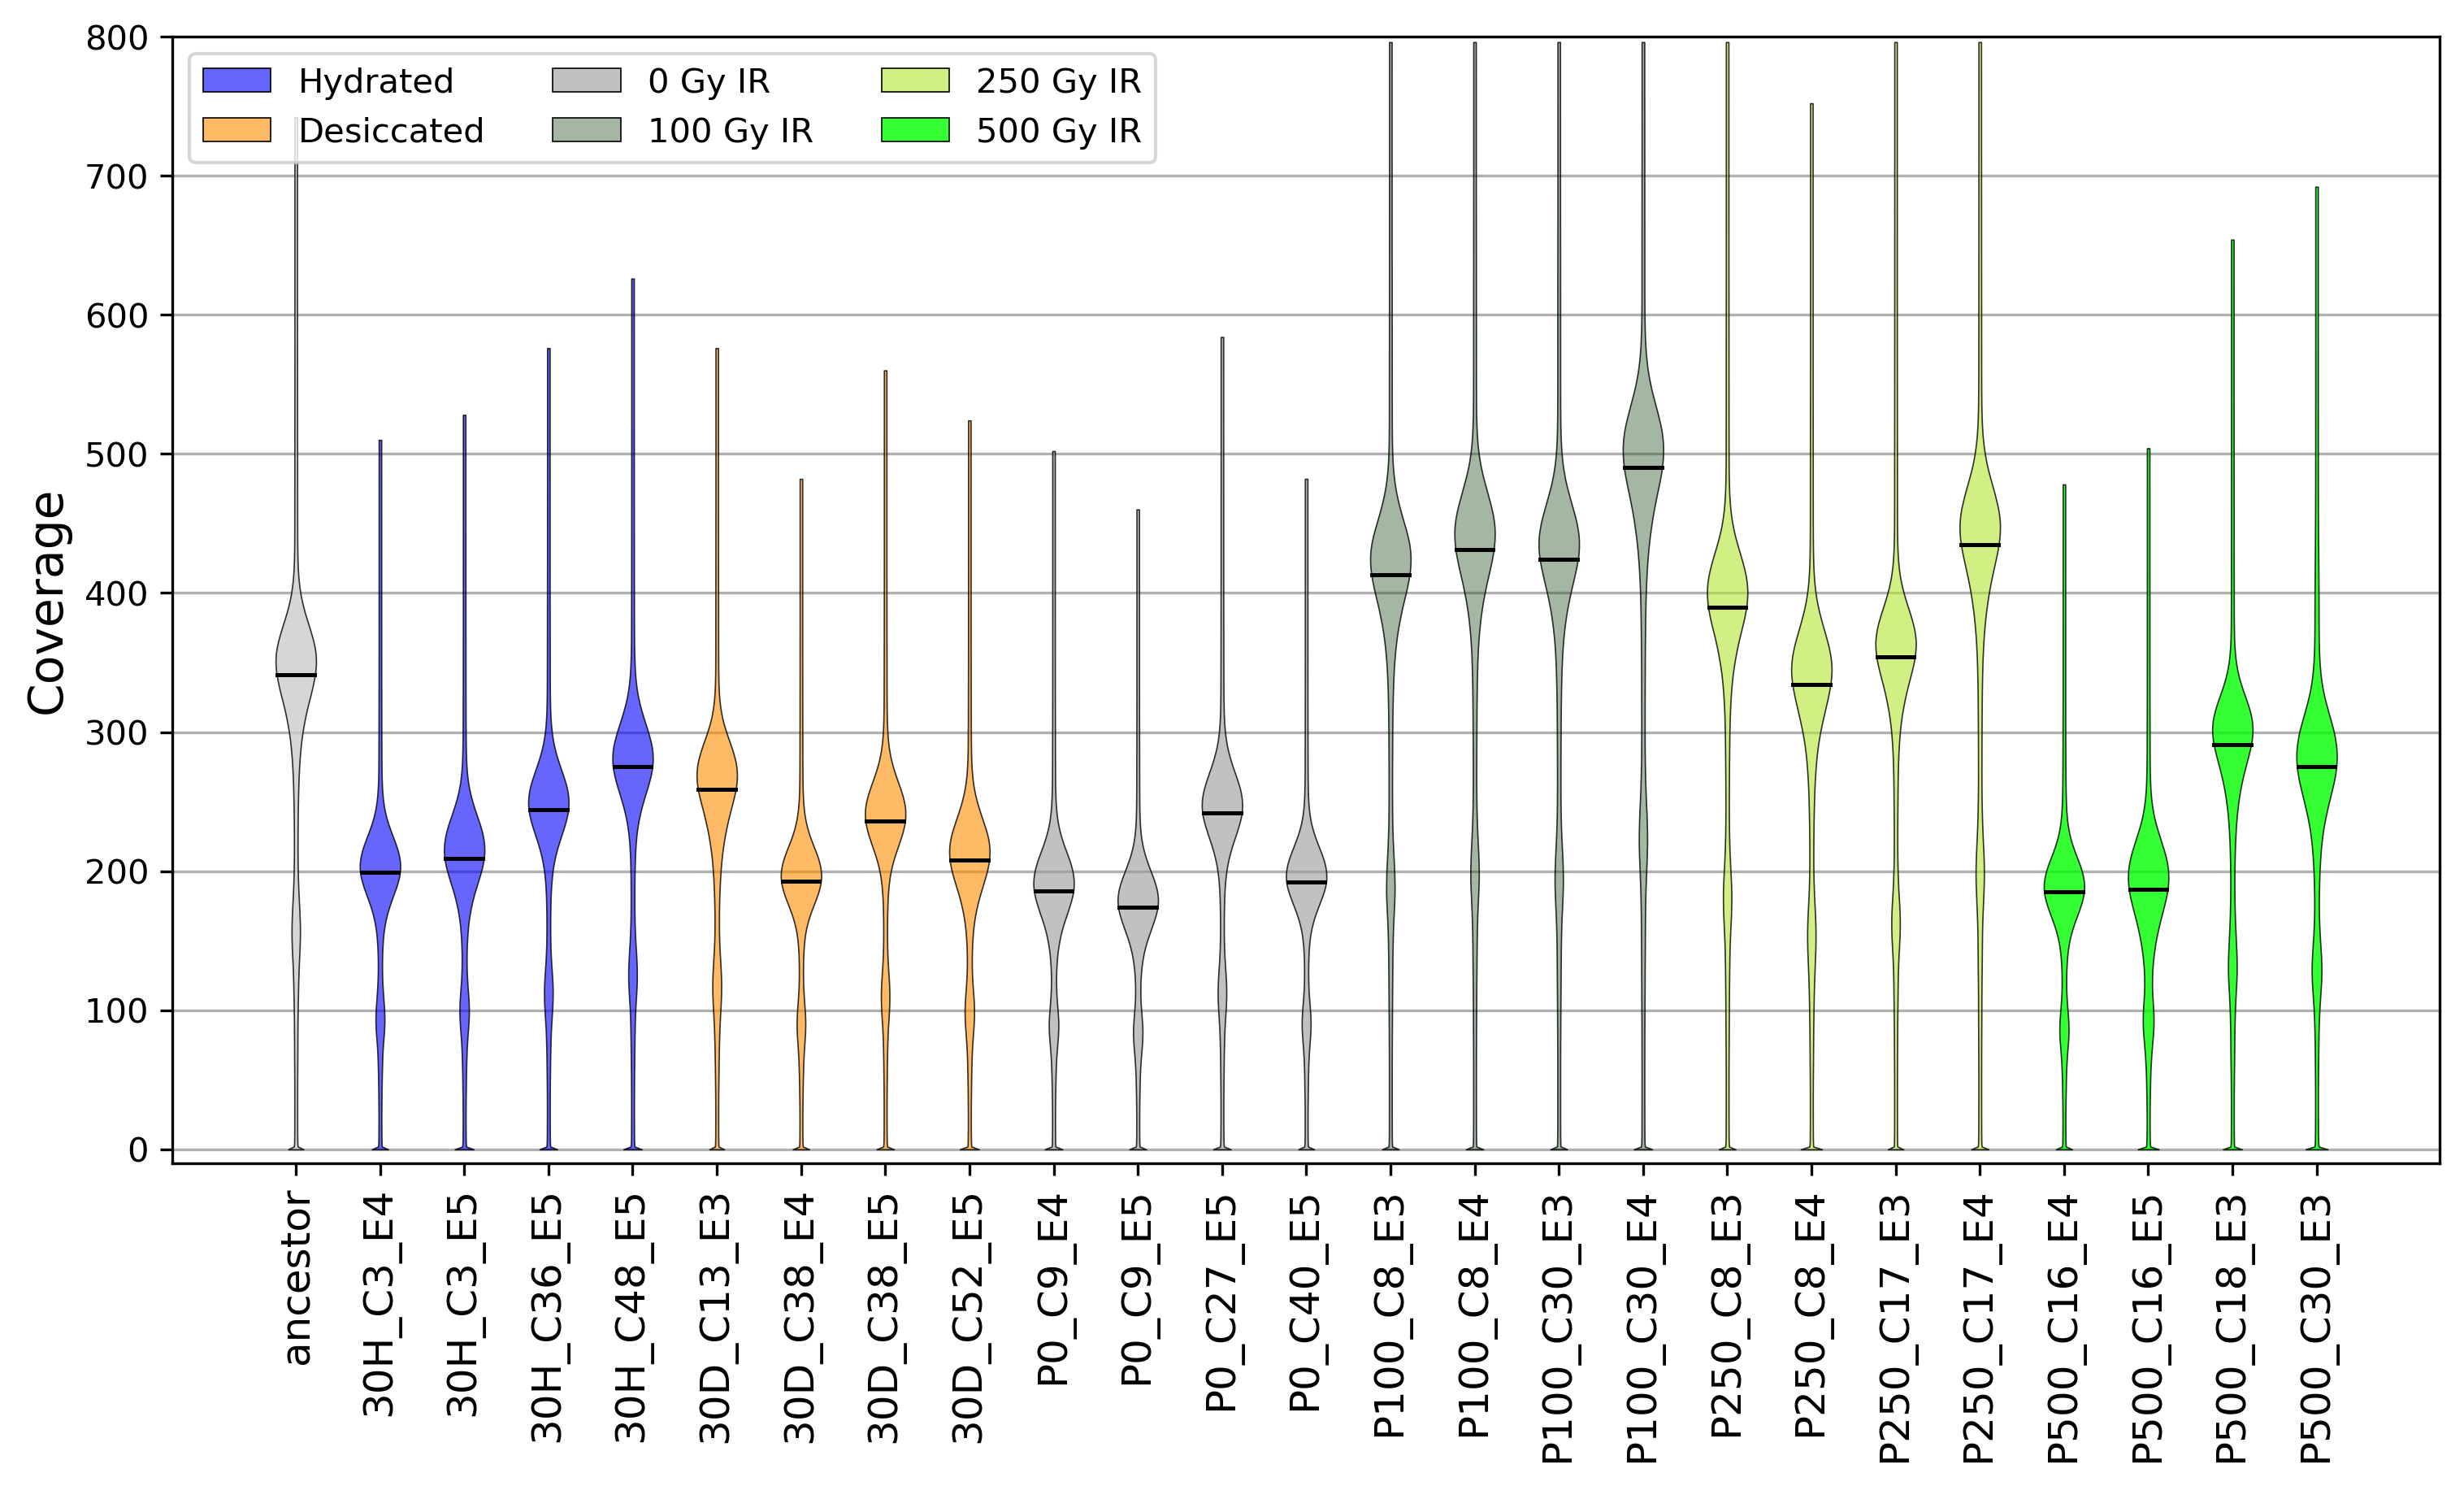

In [16]:
fig, ax = plt.subplots(figsize=(12,6))

labels = []
labels_positions = []

p = 0
for sm, info in samples_infor.items() :
    
    color = info[0]
    is_50gen = info[1]
    
    h = histograms_pickle[sm]
    bins, edges = h[0], h[1]
    
    median = info[2]
    
    #alpha = 0.3 if is_50gen else 0.6
    ls = "--" if is_50gen else "-"
    
    width = 0.9
    space = 1.1
    space_sample = 2.0
    
    nb, ne = [], []
    for i, j in zip(bins, edges[:-1]) :
        if i >= 1000 :
            nb.append(i)
            ne.append(j)
    
    nb = np.array(nb)
    #print(nb[:5], ne[:5])
    ne = np.array(ne)
    #print(ne[:5], edges[:5])
    #break
    
    violinplot_from_hist(ax, nb, ne, p, width, median, color=color, linestyle=ls)
    if not is_50gen :
        labels_positions.append(p)
        labels.append(sm)
        p += space_sample
    else :
        #labels_positions.append(i)
        #labels.append("")
        p += space

ax.set_ylim(-10,800)
ax.grid(axis="y", zorder=-1)
ax.set_ylabel("Coverage", fontsize=14)
ax.set_xticks(labels_positions)
ax.set_xticklabels(labels, rotation="vertical", fontsize=12)

legend_elements = (
    Patch(facecolor=(0,0,1.0,0.6), lw=0.4, ec="k", label="Hydrated"),
    Patch(facecolor=(1.0,0.55,0.0,0.6), lw=0.4, ec="k", label="Desiccated"),
    Patch(facecolor=(0.6,0.6,0.6,0.6), lw=0.4, ec="k", label="0 Gy IR"),
    Patch(facecolor=(0.1,0.3,0.1,0.4), lw=0.4, ec="k", label="100 Gy IR"),
    Patch(facecolor=(0.7,0.9,0.2,0.6), lw=0.4, ec="k", label="250 Gy IR"),
    Patch(facecolor=(0.0,1.0,0.0,0.8), lw=0.4, ec="k", label="500 Gy IR"),
)

ax.legend(handles=legend_elements, loc="upper left", ncol=3)

plt.show()